In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_ids = test_df['Id']

In [ ]:
# Step 1: Data Preparation
y = df['SalePrice']
df_x = df.drop(columns=['SalePrice', 'Id'])
test_df_x = test_df.drop(columns=['Id'])

In [ ]:
# Add TotalSF feature
df_x['TotalSF'] = df_x['TotalBsmtSF'].fillna(0) + df_x['1stFlrSF'].fillna(0) + df_x['2ndFlrSF'].fillna(0)
test_df_x['TotalSF'] = test_df_x['TotalBsmtSF'].fillna(0) + test_df_x['1stFlrSF'].fillna(0) + test_df_x['2ndFlrSF'].fillna(0)

# Add TotalSF to the original df as well for correlation calculation
df['TotalSF'] = df['TotalBsmtSF'].fillna(0) + df['1stFlrSF'].fillna(0) + df['2ndFlrSF'].fillna(0)

In [ ]:
df_x['Alley'] = df_x['Alley'].fillna('No alley')
df_x['BsmtQual'] = df_x['BsmtQual'].fillna('No basement')
df_x['FireplaceQu'] = df_x['FireplaceQu'].fillna('No fireplace')
df_x['GarageType'] = df_x['GarageType'].fillna('No garage')
df_x['GarageFinish'] = df_x['GarageFinish'].fillna('No garage')
df_x['GarageQual'] = df_x['GarageQual'].fillna('No garage')
df_x['PoolQC'] = df_x['PoolQC'].fillna('No pool')
df_x['Fence'] = df_x['Fence'].fillna('No fence')
df_x['MiscFeature'] = df_x['MiscFeature'].fillna('None')
df_x['MasVnrType'] = df_x['MasVnrType'].fillna('No MasV')
df_x['BsmtCond'] = df_x['BsmtCond'].fillna('No BsmtCond')
df_x['BsmtExposure'] = df_x['BsmtExposure'].fillna('No BsmtExposure')
df_x['BsmtFinType1'] = df_x['BsmtFinType1'].fillna('No BsmtFinType1')
df_x['BsmtFinType2'] = df_x['BsmtFinType2'].fillna('No BsmtFinType2')
df_x['GarageCond'] = df_x['GarageCond'].fillna('No GarageCond')

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df_x.select_dtypes(include='number').columns
non_numeric_cols = df_x.select_dtypes(exclude='number').columns

# Add 'SalePrice' and 'TotalSF' back to numerical_cols for correlation calculation with the original df
numerical_cols_with_target_and_new_feature = df.select_dtypes(include='number').columns

In [ ]:
for col in numerical_cols:
    Q1 = df_x[col].quantile(0.25)
    Q3 = df_x[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values below lower_bound with lower_bound
    df_x.loc[df_x[col] < lower_bound, col] = lower_bound
    print()

    # Replace values above upper_bound with upper_bound
    df_x.loc[df_x[col] > upper_bound, col] = upper_bound

/tmp/ipython-input-2497536664.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1481.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_x.loc[df_x[col] < lower_bound, col] = lower_bound
/tmp/ipython-input-2497536664.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_x.loc[df_x[col] < lower_bound, col] = lower_bound
/tmp/ipython-input-2497536664.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1911.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_x.loc[df_x[col] < lower_bound, col] = lower_bound
/tmp/ipython-input-2497536664.py:10: FutureWarning: Set

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the training data to evaluate model performance
train_predictions = model.predict(X_train)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

print(f"Root Mean Squared Error (RMSE) on training data: {rmse:.2f}")

Root Mean Squared Error (RMSE) on training data: 1772.36


In [ ]:
import seaborn as sns


<Axes: xlabel='LotFrontage'>

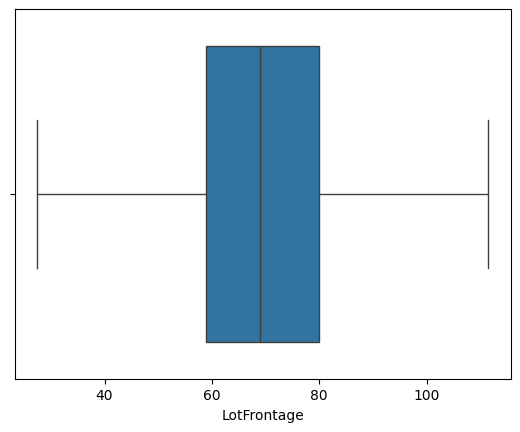

In [ ]:
sns.boxplot(x=df_x.LotFrontage)


In [ ]:
df_xx= df_x[['GrLivArea', 'OverallQual', 'YearBuilt',
            'GarageCars', 'TotalBsmtSF', 'FullBath',
            'GarageArea','BsmtQual','Neighborhood', 'ExterQual', 'KitchenQual', '1stFlrSF']]

df_encoded = pd.get_dummies(df_xx, columns=[col for col in non_numeric_cols if col in df_xx.columns], drop_first=True)

In [ ]:
def preprocess_all_data(df):
    df_x = df.drop(columns=["SalePrice"])
    y = df["SalePrice"]

    # Exclude 'Id' from numerical columns as it's not a feature for the model
    numerical_cols = df_x.select_dtypes(include=["int64", "float64"]).columns.tolist()
    if 'Id' in numerical_cols:
        numerical_cols.remove('Id')

    categorical_cols = df_x.select_dtypes(include=["object", "category"]).columns.tolist()

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    #all data
    X_train = df_x
    y_train = y

    return X_train, y_train, preprocessor

In [ ]:
# ---------- Apply preprocessing on ALL data ----------
X_train, y_train, preprocessor = preprocess_all_data(df)

# ---------- Build pipeline with XGBoost ----------
from xgboost import XGBRegressor
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# ---------- Fit model on ALL data ----------
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualF...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
# Make predictions on the test data
test_predictions = model.predict(test_df_x)

# You can print the first few predictions to check
print("First 5 test predictions:", test_predictions[:5])

First 5 test predictions: [138711.3  152814.64 191286.33 190823.3  195841.66]


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 15, 16, 30, 31, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Step 10: Prepare Submission File
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)
